In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
credit_df = pd.read_csv("CreditCard_DV.csv")
credit_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Credit_Limit,Total_Revolving_Bal,Avg_Purchase,Total_Trans_Amt
0,768805383,Existing Customer,45,M,3,High School,$60K - $80K,12691.0,777,11914.0,1144
1,818770008,Existing Customer,49,F,5,Graduate,Less than $40K,8256.0,864,7392.0,1291
2,713982108,Existing Customer,51,M,3,Graduate,$80K - $120K,3418.0,0,3418.0,1887
3,769911858,Existing Customer,40,F,4,High School,Less than $40K,3313.0,2517,796.0,1171
4,709106358,Existing Customer,40,M,3,Uneducated,$60K - $80K,4716.0,0,4716.0,816
...,...,...,...,...,...,...,...,...,...,...,...
95,719712633,Existing Customer,64,M,1,Graduate,Less than $40K,1709.0,895,814.0,1673
96,772629333,Existing Customer,45,M,3,Graduate,$40K - $60K,3454.0,1200,2254.0,1313
97,720336708,Existing Customer,53,M,3,Doctorate,$40K - $60K,3789.0,1706,2083.0,1609
98,802013583,Existing Customer,56,M,3,College,$120K +,9689.0,2250,7439.0,1158


# Create a bivariate plot to find if there is a correlation between credit card limit and average purchase made on the card

Text(0.5, 1.0, 'Credit_Limit vs Avg_Purchase')

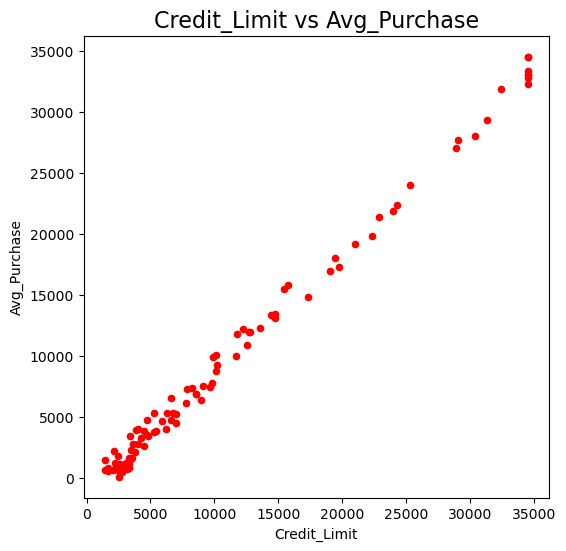

In [10]:
ax = credit_df.plot("Credit_Limit","Avg_Purchase",kind = "scatter",color = "red",marker = "o",figsize = (6,6))
ax.set_xlabel("Credit_Limit")
ax.set_ylabel("Avg_Purchase")
ax.set_title("Credit_Limit vs Avg_Purchase",fontsize = 16)

# Visualise the distribution of values for credit card limit and average purchase made on the card.Also,identify the outliers in the data,if any.

In [11]:
credit_df["Credit_Limit"].describe()

count      100.000000
mean     10881.756000
std      10056.333148
min       1438.300000
25%       3309.250000
50%       6666.000000
75%      14746.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

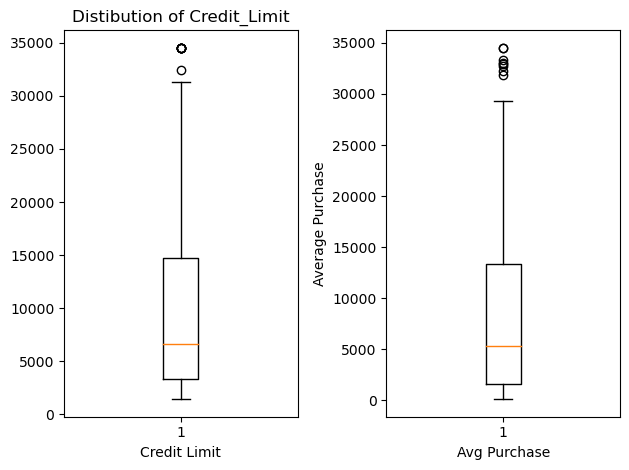

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.boxplot(credit_df["Credit_Limit"])
ax2.boxplot(credit_df["Avg_Purchase"])
ax1.set_title('Distibution of Credit_Limit')
ax1.set_xlabel('Credit Limit')
ax2.set_ylabel('Average Purchase')
ax2.set_xlabel('Avg Purchase')
fig.tight_layout()

In [19]:
cr_limit_arr = credit_df["Credit_Limit"]
q1 = np.quantile(cr_limit_arr,0.25)
q3 = np.quantile(cr_limit_arr,0.75)
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print("IQR",iqr)
print("upper_bound:",upper_bound)
print("lower_bound:",lower_bound)

IQR 11437.25
upper_bound: 31902.375
lower_bound: -13846.625


In [22]:
outliers = cr_limit_arr[(cr_limit_arr<=lower_bound) | (cr_limit_arr<=upper_bound)]
print('The following are the outliers in the boxplot of Credit Limit:\n',outliers)

The following are the outliers in the boxplot of Credit Limit:
 0     12691.0
1      8256.0
2      3418.0
3      3313.0
4      4716.0
       ...   
95     1709.0
96     3454.0
97     3789.0
98     9689.0
99     5449.0
Name: Credit_Limit, Length: 92, dtype: float64
